# Minimal Example of using an img2img-model
## Install libraries 
Run this once in the beginning or to get the new code for the course

In [4]:
!pip install diffusers
!pip install transformers
!pip install accelerate
!pip uninstall tensorflow -y
!pip install opencv-python
!pip install ffmpegcv
!pip install scipy
!pip install numpy
!pip install tqdm
!pip install scikit-image
!pip install pillow
!pip install --upgrade --force-reinstall git+https://github.com/leon-etienne/gensurv.git@main  # Install from main branch
%load_ext autoreload
%autoreload 2
from gensurv import *

  Cloning https://github.com/leon-etienne/gensurv.git (to revision main) to /tmp/pip-req-build-d5_d3_0z
  Running command git clone --filter=blob:none --quiet https://github.com/leon-etienne/gensurv.git /tmp/pip-req-build-d5_d3_0z
  Resolved https://github.com/leon-etienne/gensurv.git to commit f1115c08e77673ba1f997deeb5251c2b9613f8fb
  Preparing metadata (setup.py) ... done
  Created wheel for gensurv: filename=gensurv-0.1.1-py3-none-any.whl size=7850 sha256=281fde502cf0a671dfb8f4f6e29e571f1fb173277a4ce7035225d733dea38a81
  Stored in directory: /tmp/pip-ephem-wheel-cache-4p1q7av9/wheels/3a/75/52/0d4cd0f9e638444cb4b2ec6df244a743705eaaf10a027729c8
Successfully built gensurv
  Attempting uninstall: gensurv
    Found existing installation: gensurv 0.1.1
    Uninstalling gensurv-0.1.1:
      Successfully uninstalled gensurv-0.1.1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import Libraries
Run this once in the beginnig

In [5]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
import transformers
import torch

This is the minimal code to run an img2img-model:

Parameters you could change:

- `model_name`: Name of the model we want to use (uses huggingface.co model-names, keep sdxl-turbo for now)
- `seed`: This will change the initial noise-pattern for the image generation (same seed = same image)
- `init_image`: This is the image we will use as a basis for the img2img-model (path can be changed to be a local path aswell)
- `prompt`: Prompt to be applied to `init_image` and basis for the text-guided generation

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


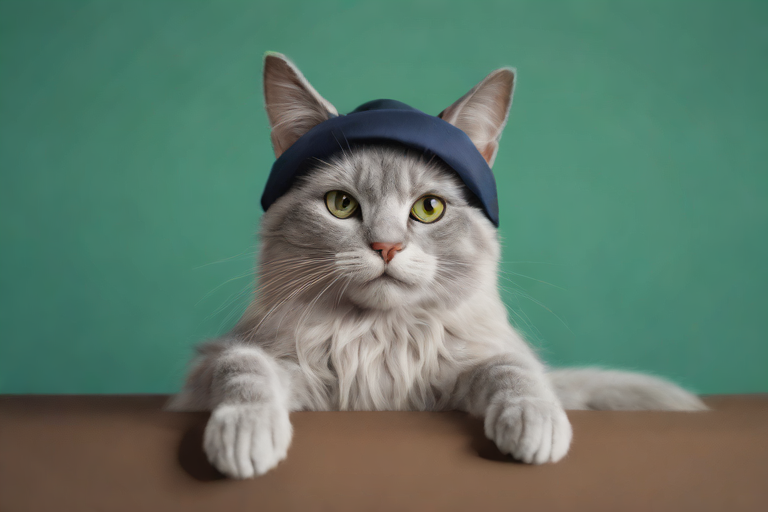

In [6]:
# Load the model in this case Stable Diffusion XL Turbo (https://huggingface.co/stabilityai/sdxl-turbo)
# The first time this is run, it will download the model, this can take some time
model_name = "stabilityai/sdxl-turbo"
pipe = AutoPipelineForImage2Image.from_pretrained(model_name, torch_dtype=torch.float16, variant="fp16")
# Put the model onto the GPU
pipe = pipe.to("cuda")

# Enable some settings that increase performance
pipe.enable_vae_slicing()
pipe.enable_sequential_cpu_offload()
pipe.enable_model_cpu_offload()

# You can change the seed here which will change the starting condition for the noise that is being used to generate
seed = 1
generator = torch.Generator(device="cuda").manual_seed(seed)

# Load the initial image you want to use as the basis for the image generator 
# You can change the path to a local path like image.png and resize by changing the number after resize(width, height)
# Don't make the resolution too high or might crash the notebook use Kernel > Restart Kernel to fix that
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png").resize((768, 512))

# Change the prompt to description that manipulates the image
prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"

# Run the model and show the image
image = pipe(prompt, image=init_image, num_inference_steps=2, strength=0.5, guidance_scale=0.0, generator=generator).images[0]

# You should see a cat!
image